In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#importing dataset
df=pd.read_csv(r"C:\Users\USER\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Using Ordinal encoding to convert each label into interger values
cols = ['gender','Partner','Dependents','PhoneService', 
        'MultipleLines','InternetService','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport',
        'StreamingTV','StreamingMovies','Contract','TotalCharges',
        'PaperlessBilling','PaymentMethod']
ord = OrdinalEncoder()
ord.fit(df[cols])
df[cols] = ord.transform(df[cols])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,No
1,5575-GNVDE,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,No
2,3668-QPYBK,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,Yes
3,7795-CFOCW,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,No
4,9237-HQITU,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,Yes


In [4]:
#The dataset's independent attributes are stored in a variable called 'X', while the target variable is stored in a variable called 'y'
X = df.drop(columns = ['Churn', 'customerID'])
y = df['Churn'].values
X=X.astype(float)


In [5]:
#from the sklearn.model_selection package, we can use the train_test_split function to generate both the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=  0.20, random_state=1)
print('X_train:',len(X_train))
print('X_test:',len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

X_train: 5634
X_test: 1409
y_train 5634
y_test 1409


In [6]:
#Logistic Regression
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy)

Logistic Regression accuracy is : 0.8069552874378992


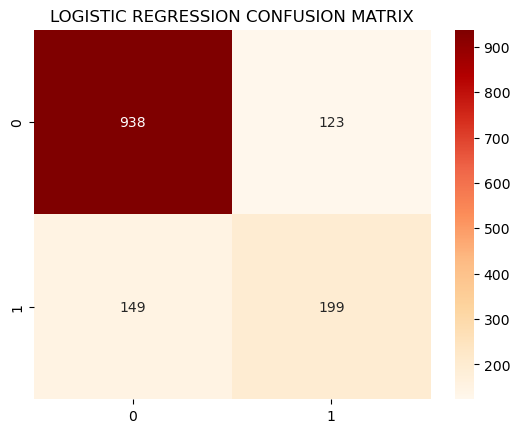

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX");

In [8]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

          No       0.86      0.88      0.87      1061
         Yes       0.62      0.57      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [9]:
#Decision Tree
model = make_pipeline(StandardScaler(),DecisionTreeClassifier())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy)

Decision Tree accuracy is : 0.7430801987224982


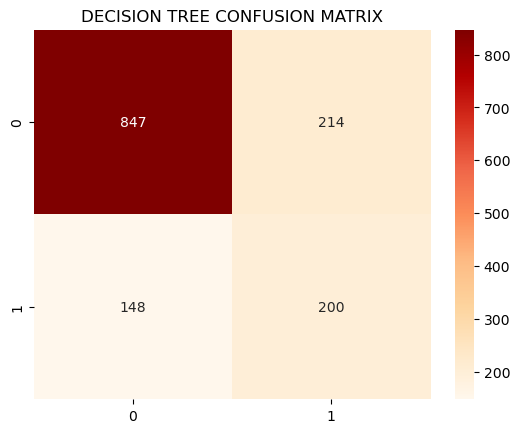

In [10]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("DECISION TREE CONFUSION MATRIX");

In [11]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.85      0.80      0.82      1061
         Yes       0.48      0.57      0.52       348

    accuracy                           0.74      1409
   macro avg       0.67      0.69      0.67      1409
weighted avg       0.76      0.74      0.75      1409



In [12]:
#Random Forest
model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Random forest accuracy :",accuracy)

Random forest accuracy : 0.8062455642299503


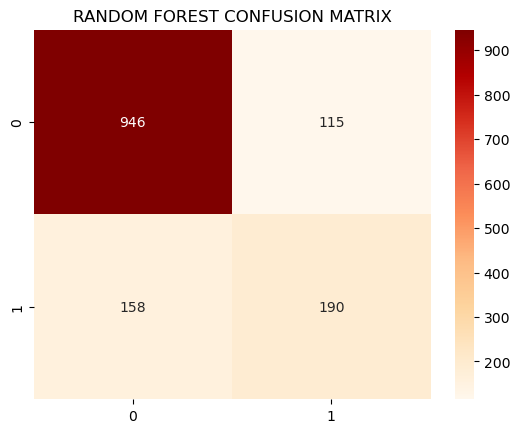

In [13]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("RANDOM FOREST CONFUSION MATRIX");

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87      1061
         Yes       0.62      0.55      0.58       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [15]:
#K-Nearest Neighbors
model = make_pipeline(StandardScaler(),KNeighborsClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("K-Nearest Neighbors: ", accuracy)

K-Nearest Neighbors:  0.7700496806245565


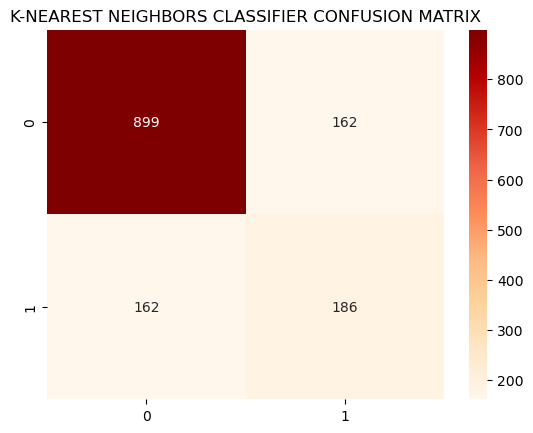

In [16]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("K-NEAREST NEIGHBORS CLASSIFIER CONFUSION MATRIX");

In [17]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

          No       0.85      0.85      0.85      1061
         Yes       0.53      0.53      0.53       348

    accuracy                           0.77      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.77      0.77      0.77      1409



In [18]:
#AdaBoost Classifier
model = make_pipeline(StandardScaler(), AdaBoostClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("AdaBoost Classifier accuracy :",accuracy)


AdaBoost Classifier accuracy : 0.8097941802696949


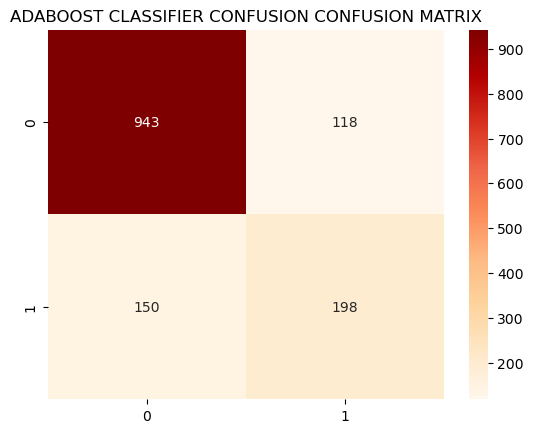

In [19]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("ADABOOST CLASSIFIER CONFUSION CONFUSION MATRIX");

In [20]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

          No       0.86      0.89      0.88      1061
         Yes       0.63      0.57      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [21]:
#Gradient Boost Algorithm 
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, y_pred))

Gradient Boosting Classifier 0.8161816891412349


Text(0.5, 1.0, 'GRADIENT BOOSTING CLASSIFIER CONFUSION MATRIX')

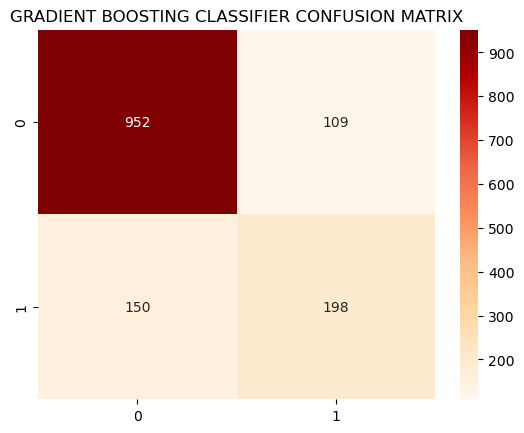

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("GRADIENT BOOSTING CLASSIFIER CONFUSION MATRIX")

In [23]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1061
         Yes       0.64      0.57      0.60       348

    accuracy                           0.82      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409



In the given scenario, the obtained sensitivity (also known as true positive rate) is 0.897, indicating that the model accurately predicts a high proportion of customers who churned. On the other hand, the specificity (also known as true negative rate) is 0.64, indicating that the model is better at predicting customers who did not churn.

It is important to note that gradient boosting classifiers, like the one used in this model, tend to have a bias towards classes with more observations. In this case, since there might be more non-churned customers in the dataset, the model may prioritize predicting non-churned customers more accurately.

In summary, the model's performance is more reliable when predicting customers who did not churn, while it may have a slightly lower accuracy in predicting churned customers. This bias is inherent to gradient boosting classifiers and can be addressed by adjusting the model parameters or using alternative techniques to balance the class distribution.

In [24]:
model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Extra Trees Classifier Score :", accuracy_score(y_test, y_pred))

Extra Trees Classifier Score : 0.7835344215755855


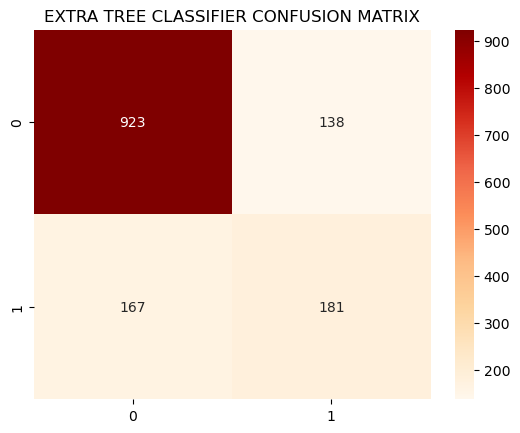

In [25]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("EXTRA TREE CLASSIFIER CONFUSION MATRIX");

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.87      0.86      1061
         Yes       0.57      0.52      0.54       348

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.78      0.78      0.78      1409



After experimenting with 7 different machine learning algorithms using their default parameters, we found that the Gradient Boosting Classifier performed the best. However, we didn't stop there. We further optimized the model by fine-tuning its hyperparameters. As a result, we achieved an impressive accuracy rate of approximately 80%.

At the end of this project, we now possess a classification model that can accurately predict the churn status of clients with a success rate of 77.84%. To gain more insights and better understand the performance of the model, a confusion matrix can be used to analyze the predictions made by the model and determine the number of correctly identified churners.

To further enhance our results, we expanded our exploration to include more complex machine learning algorithms, such as Xgboost. By carefully tuning the hyperparameters of these algorithms, we were able to uncover additional valuable insights and improve the overall performance of the model.